In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 1000)              785000    
                                                                 
 dense_5 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import time

start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                 epochs=10, batch_size=100, verbose=1)
print('Fit time :', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.2212 - accuracy: 0.9357 - val_loss: 0.1094 - val_accuracy: 0.9663
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0868 - accuracy: 0.9740 - val_loss: 0.0762 - val_accuracy: 0.9770
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0536 - accuracy: 0.9840 - val_loss: 0.0686 - val_accuracy: 0.9782
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0369 - accuracy: 0.9887 - val_loss: 0.0599 - val_accuracy: 0.9818
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0258 - accuracy: 0.9924 - val_loss: 0.0647 - val_accuracy: 0.9796
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0176 - accuracy: 0.9951 - val_loss: 0.0743 - val_accuracy: 0.9776
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0162 - accuracy: 0.9951 - val_loss: 0.0681 - val_accuracy: 0.9796
Epoch 

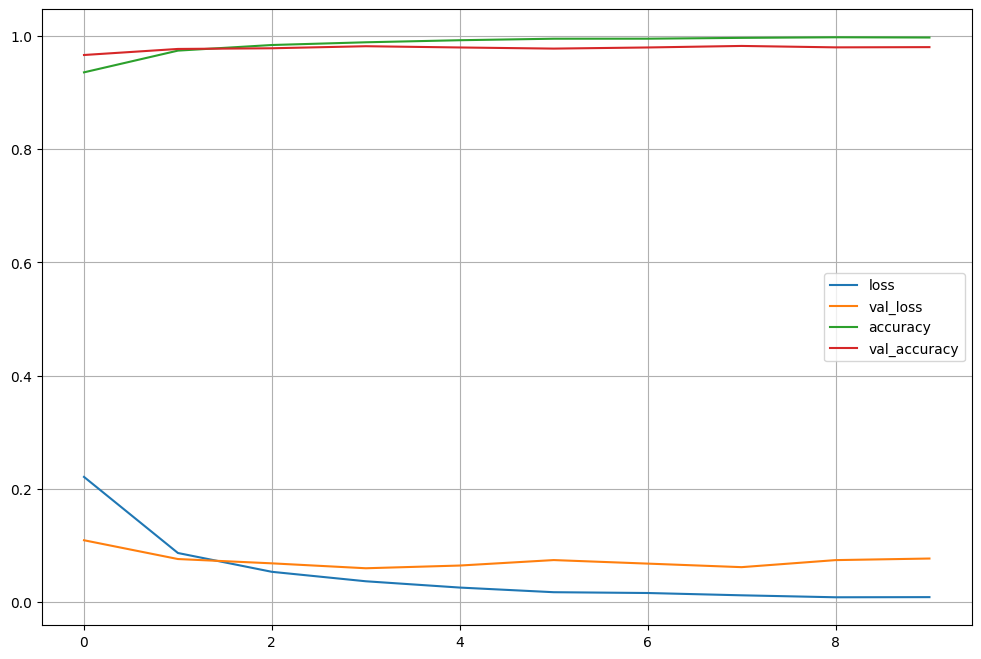

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
  plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0771 - accuracy: 0.9802
Test loss : 0.07707604765892029
Test accuracy : 0.9801999926567078


In [ ]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
wrong_result = []

for n in range(0, len(y_test)):
  if predicted_labels[n] != y_test[n]:
    wrong_result.append(n)

len(wrong_result)

198

In [ ]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[1260,
 684,
 7434,
 720,
 9587,
 5888,
 2597,
 2743,
 1530,
 6023,
 2070,
 1395,
 2016,
 2730,
 4369,
 3808]

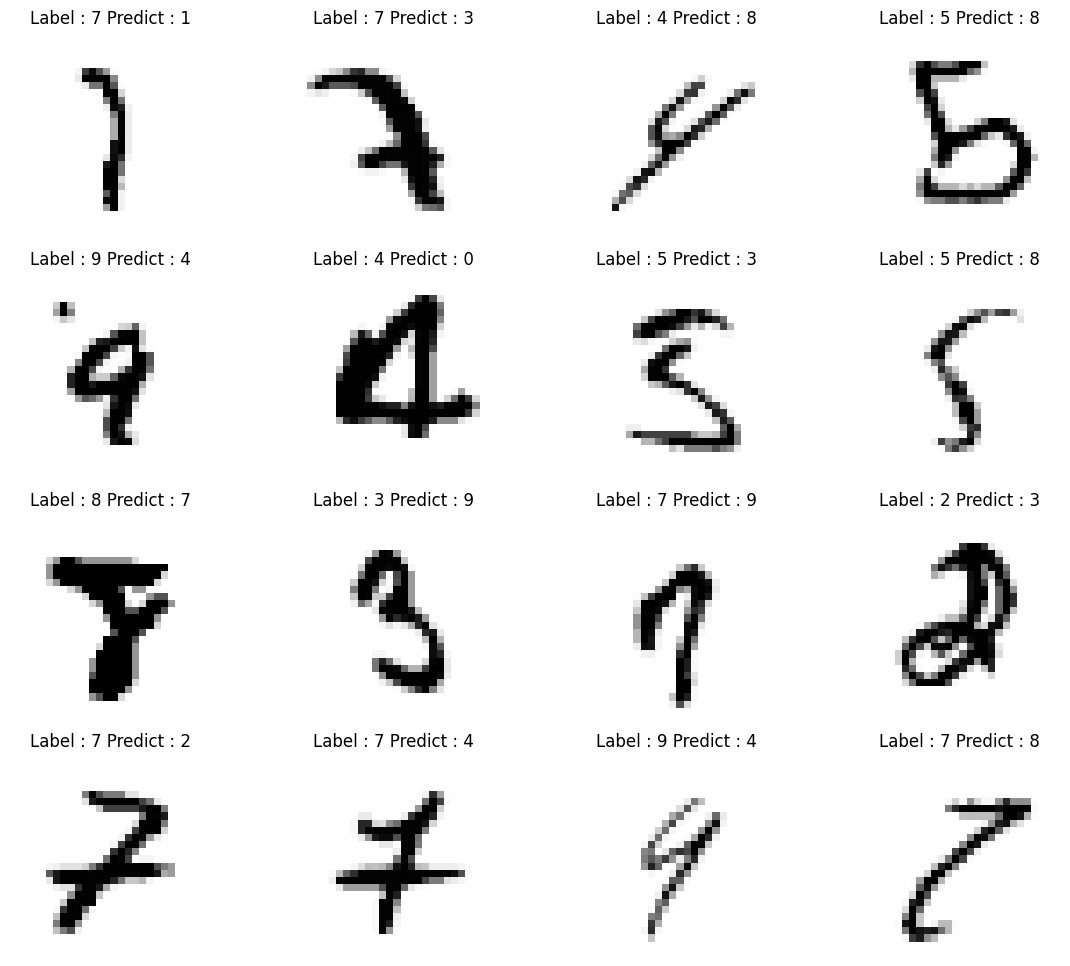

In [ ]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
  plt.subplot(4, 4, idx+1)
  plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
  plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
  plt.axis('off')

plt.show()